In [1]:
import matplotlib.pyplot as plt
import fastf1.plotting


fastf1.Cache.enable_cache('f1/cache')  # replace with your cache directory

# enable some matplotlib patches for plotting timedelta values and load
# FastF1's default color scheme
fastf1.plotting.setup_mpl()

# load a session and its telemetry data
session = fastf1.get_session(2023, 'Azerbaijan Grand Prix', 'Q')
session.load()

core           INFO 	Loading data for Azerbaijan Grand Prix - Qualifying [v2.3.2]
api            INFO 	No cached data found for driver_info. Loading data...
api            INFO 	Fetching driver list...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_data. Loading data...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_app_data. Loading data...
api            INFO 	Fetching timing app data...
api            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
api            INFO 	No cached data found for session_status_data. Loading data...
api            INFO 	Fetching session status data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for track_status_data. Loading data...
api            INFO 	Fetching 

In [2]:
lec_lap = session.laps.pick_driver('LEC').pick_fastest()
ver_lap = session.laps.pick_driver('VER').pick_fastest()

In [4]:
ver_tel = ver_lap.get_car_data().add_distance()
lec_tel = lec_lap.get_car_data().add_distance()

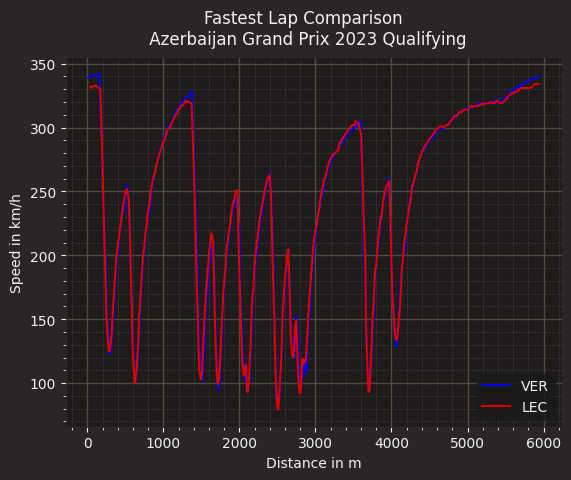

In [5]:
fer_color = fastf1.plotting.team_color('FER')
rbr_color = fastf1.plotting.team_color('RBR')

fig, ax = plt.subplots()
ax.plot(ver_tel['Distance'], ver_tel['Speed'], color=rbr_color, label='VER')
ax.plot(lec_tel['Distance'], lec_tel['Speed'], color=fer_color, label='LEC')

ax.set_xlabel('Distance in m')
ax.set_ylabel('Speed in km/h')

ax.legend()
plt.suptitle(f"Fastest Lap Comparison \n "
             f"{session.event['EventName']} {session.event.year} Qualifying")

plt.show()
